In [7]:
#Import dependencies
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from acquire_cluster import my_db, my_train_test_split
import seaborn as sns

In [8]:
zillow = my_db(''' SELECT prop.*,
                      predictions_2017.logerror,
                      predictions_2017.transactiondate,
                      air.airconditioningdesc,
                      arch.architecturalstyledesc,
                      build.buildingclassdesc,
                      heat.heatingorsystemdesc,
                      land.propertylandusedesc,
                      story.storydesc,
                      type.typeconstructiondesc
FROM properties_2017 prop
JOIN (
    SELECT parcelid, MAX(transactiondate) AS max_transactiondate
FROM predictions_2017
GROUP BY parcelid
) pred USING(parcelid)
JOIN predictions_2017 ON pred.parcelid = predictions_2017.parcelid
AND pred.max_transactiondate = predictions_2017.transactiondate
LEFT JOIN airconditioningtype air USING(airconditioningtypeid)
LEFT JOIN architecturalstyletype arch USING(architecturalstyletypeid)
LEFT JOIN buildingclasstype build USING(buildingclasstypeid)
LEFT JOIN heatingorsystemtype heat USING(heatingorsystemtypeid)
LEFT JOIN propertylandusetype land USING(propertylandusetypeid)
LEFT JOIN storytype story USING(storytypeid)
LEFT JOIN typeconstructiontype type USING(typeconstructiontypeid)
WHERE propertylandusedesc = "Single Family Residential"
AND transactiondate <= '2017-12-31'
AND prop.longitude IS NOT NULL
AND prop.latitude IS NOT NULL''', 'zillow')

In [9]:
zillow

,id,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,...,censustractandblock,logerror,transactiondate,airconditioningdesc,architecturalstyledesc,buildingclassdesc,heatingorsystemdesc,propertylandusedesc,storydesc,typeconstructiondesc
0,1727539,14297519,NaN,NaN,NaN,3.5,4.0,None,NaN,3.5,...,6.059063e+13,0.025595,2017-01-01,None,None,None,None,Single Family Residential,None,None
1,1387261,17052889,NaN,NaN,NaN,1.0,2.0,None,NaN,1.0,...,6.111001e+13,0.055619,2017-01-01,None,None,None,None,Single Family Residential,None,None
2,11677,14186244,NaN,NaN,NaN,2.0,3.0,None,NaN,2.0,...,6.059022e+13,0.005383,2017-01-01,None,None,None,None,Single Family Residential,None,None
3,2288172,12177905,NaN,NaN,NaN,3.0,4.0,None,8.0,3.0,...,6.037300e+13,-0.103410,2017-01-01,None,None,None,Central,Single Family Residential,None,None
4,781532,12095076,1.0,NaN,NaN,3.0,4.0,None,9.0,3.0,...,6.037461e+13,-0.001011,2017-01-01,Central,None,None,Central,Single Family Residential,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52314,2274245,12412492,NaN,NaN,NaN,2.0,4.0,None,6.0,2.0,...,6.037555e+13,0.001082,2017-09-19,None,None,None,Central,Single Family Residential,None,None
52315,673515,11000655,NaN,NaN,NaN,2.0,2.0,None,6.0,2.0,...,6.037101e+13,0.020615,2017-09-20,None,None,None,Central,Single Family Residential,None,None
52316,2968375,17239384,NaN,NaN,NaN,2.0,4.0,None,NaN,2.0,...,6.111008e+13,0.013209,2017-09-21,None,None,None,None,Single Family Residential,None,None
52317,1843709,12773139,1.0,NaN,NaN,1.0,3.0,None,4.0,1.0,...,6.037434e+13,0.037129,2017-09-21,Central,None,None,Central,Single Family Residential,None,None


In [10]:
zillow = zillow.drop(columns = [ 'architecturalstyletypeid', 'basementsqft','buildingclasstypeid','decktypeid','finishedsquarefeet13','finishedsquarefeet15','finishedsquarefeet6','storytypeid','typeconstructiontypeid','fireplaceflag','architecturalstyledesc','buildingclassdesc','storydesc','typeconstructiondesc'])

In [11]:
train, validate, test = my_train_test_split(zillow)

In [39]:
train['logerror_bin'] = pd.cut(train.logerror, [-5,-1,-.75,-.5,-.25,0,.25,.50,.75, 1, 5])

Scatterplot of latitude and longitude colored by logerror bins

In [183]:
train.logerror_bin.unique()


[(-0.25, 0.0], (0.25, 0.5], (0.0, 0.25], (-0.5, -0.25], (-1.0, -0.75], (-0.75, -0.5], (0.5, 0.75], (1.0, 5.0], (-5.0, -1.0], (0.75, 1.0]]
Categories (10, interval[float64, right]): [(-5.0, -1.0] < (-1.0, -0.75] < (-0.75, -0.5] < (-0.5, -0.25] ... (0.25, 0.5] < (0.5, 0.75] < (0.75, 1.0] < (1.0, 5.0]]

In [190]:
train.logerror_bin.value_counts().pd.CatagoricalIndex


(0.0, 0.25]      16694
(-0.25, 0.0]     13131
(0.25, 0.5]        704
(-0.5, -0.25]      342
(0.5, 0.75]        180
(1.0, 5.0]         113
(-0.75, -0.5]       84
(0.75, 1.0]         67
(-1.0, -0.75]       44
(-5.0, -1.0]        32
Name: logerror_bin, dtype: int64

Making scatterplots of latitude and longitude for each logerror bin

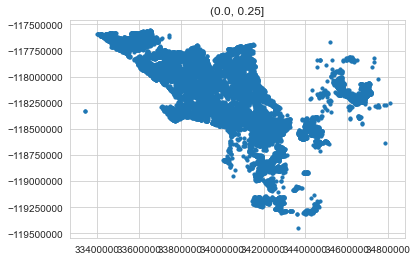

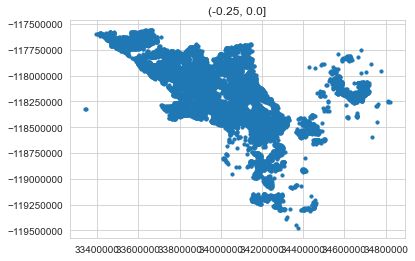

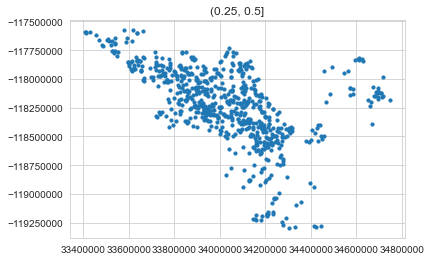

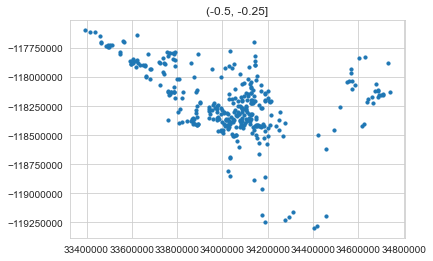

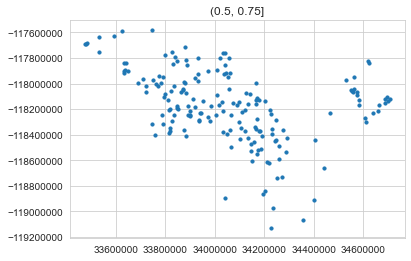

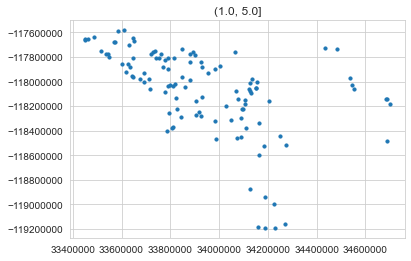

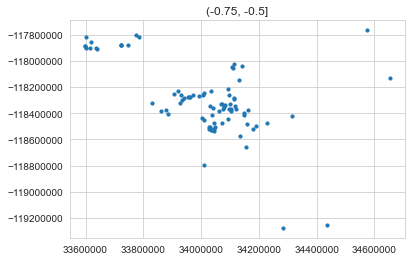

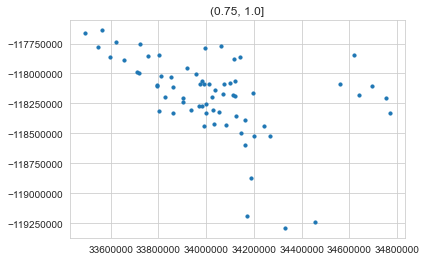

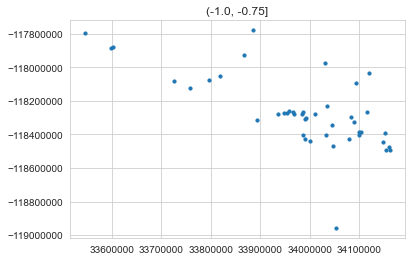

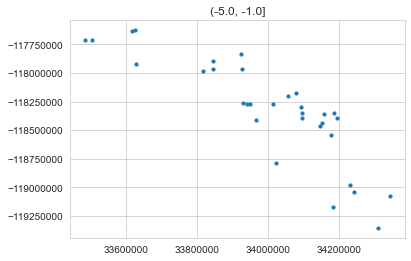

In [187]:
for x in train.logerror_bin.value_counts().index:
    plt.scatter(x='latitude', y='longitude', data=train[train.logerror_bin == x], s = 10)
    plt.title(x)
    plt.ticklabel_format(style='plain', axis='y')
    plt.ticklabel_format(style='plain', axis='x')
    plt.show()


Making scatterplot of square feet and logerror for each latitude bin

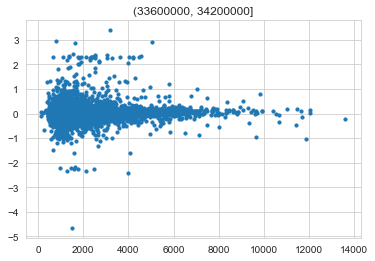

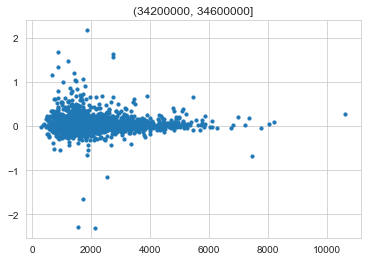

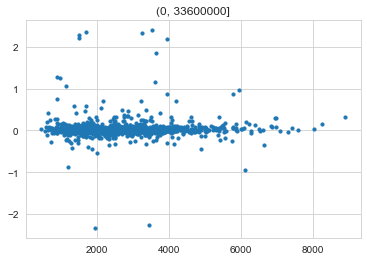

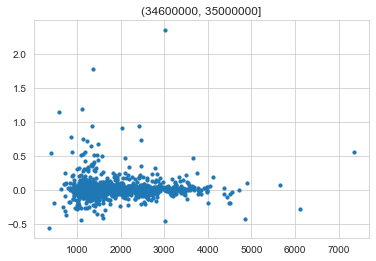

In [111]:
for x in train.latitude_bin.value_counts().index:
    plt.scatter(x='calculatedfinishedsquarefeet', y='logerror', data=train[(train.latitude_bin == x) & (train.calculatedfinishedsquarefeet < 15000)], s = 10)

    plt.title(x)
    plt.ticklabel_format(style='plain', axis='y')
    plt.ticklabel_format(style='plain', axis='x')
    plt.show()

Making scatterplot of square feet and logerror for each longitude bin

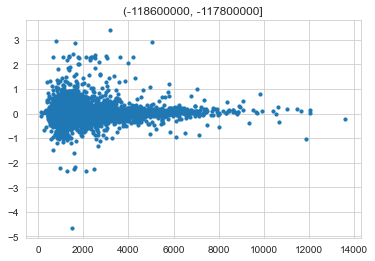

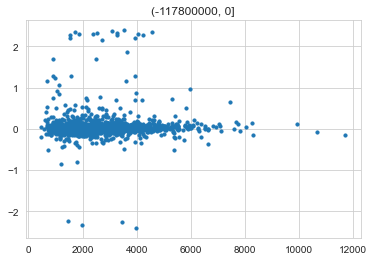

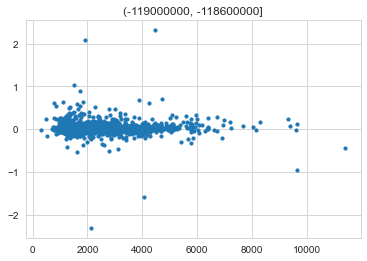

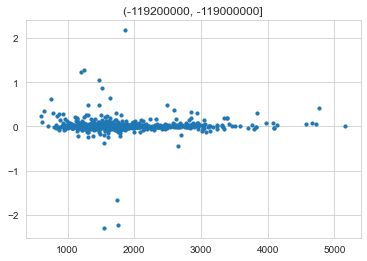

In [113]:
for x in train.longitude_bin.value_counts().index:
    plt.scatter(x='calculatedfinishedsquarefeet', y='logerror', data=train[(train.longitude_bin == x) & (train.calculatedfinishedsquarefeet < 15000)], s = 10)
    plt.title(x)
    plt.ticklabel_format(style='plain', axis='y')
    plt.ticklabel_format(style='plain', axis='x')
    plt.show()

Making scatterplot of sqaurefeet and logerror for each age bin

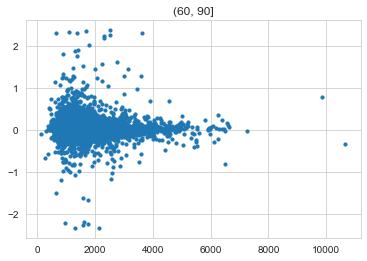

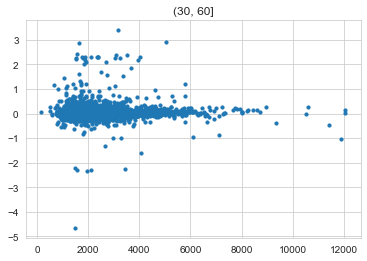

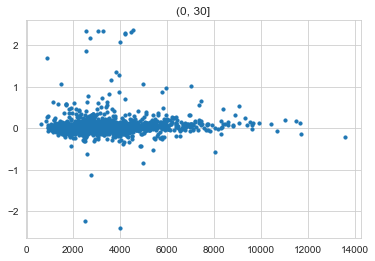

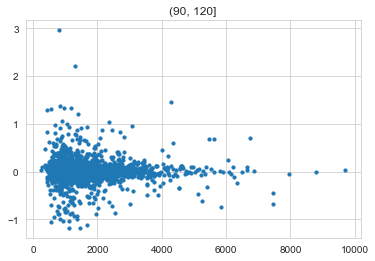

In [114]:
for x in train.age_bin.value_counts().index:
    plt.scatter(x='calculatedfinishedsquarefeet', y='logerror', data=train[(train.age_bin == x) & (train.calculatedfinishedsquarefeet < 15000)], s = 10)
    plt.title(x)
    plt.ticklabel_format(style='plain', axis='y')
    plt.ticklabel_format(style='plain', axis='x')
    plt.show()
    #most of logerror where square feet is less than 4000 and house age between 60 and 90.

Making a scatterplot of age and logerror for each squarefeet bin

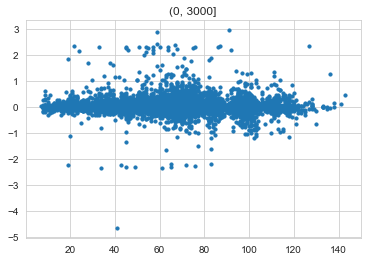

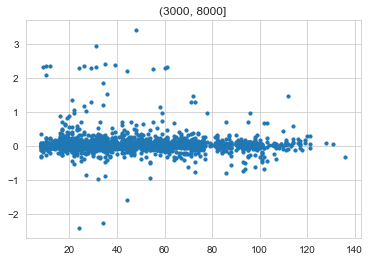

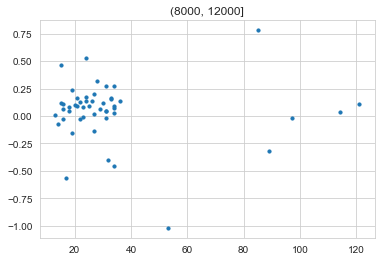

In [115]:
for x in train.squarefeet_bin.value_counts().index:
    plt.scatter(x= 'age', y='logerror', data=train[(train.squarefeet_bin == x)], s = 10)
    plt.title(x)
    plt.ticklabel_format(style='plain', axis='y')
    plt.ticklabel_format(style='plain', axis='x')
    plt.show()


In [147]:
train['latitude_bin'] = pd.cut(train.latitude, [0,33600000,34200000,34600000,35000000])
train['longitude_bin'] = pd.cut(train.longitude, [-119200000,-119000000,-118600000,-117800000,0])
train['squarefeet_bin'] = pd.cut(train.calculatedfinishedsquarefeet,[0,3000,8000,12000])
train['age'] = 2023 - train.yearbuilt
train['age_bin'] = pd.cut(train.age, [0,30,60,90,120])
train['lowerrors'] = pd.cut(train.logerror, [-.25,0,.25,.5])

Squarefeet and logerror colored by latitude bins

<AxesSubplot:xlabel='calculatedfinishedsquarefeet', ylabel='logerror'>

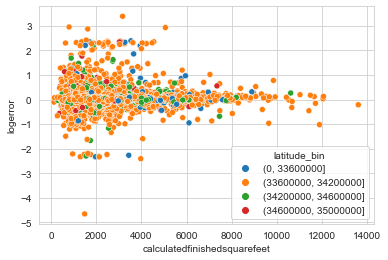

In [107]:
sns.scatterplot(data = train[train.calculatedfinishedsquarefeet < 15000], x = 'calculatedfinishedsquarefeet', y = 'logerror', hue = 'latitude_bin' )

Squarefeet and logerror colored by longitude bin

<AxesSubplot:xlabel='calculatedfinishedsquarefeet', ylabel='logerror'>

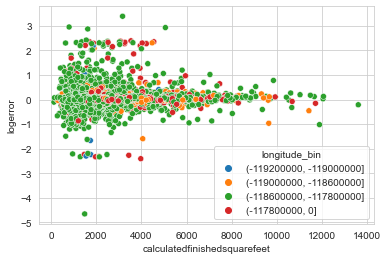

In [112]:
sns.scatterplot(data = train[train.calculatedfinishedsquarefeet < 15000], x = 'calculatedfinishedsquarefeet', y = 'logerror', hue = 'longitude_bin' )

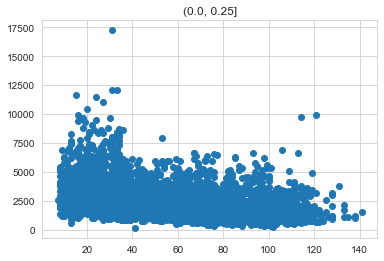

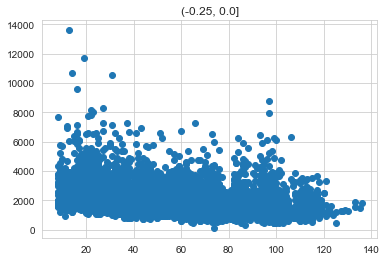

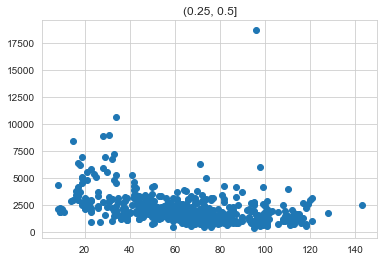

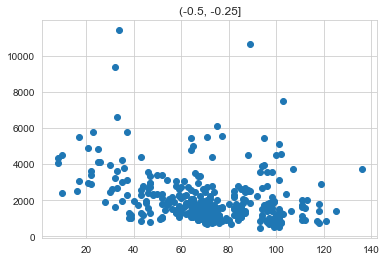

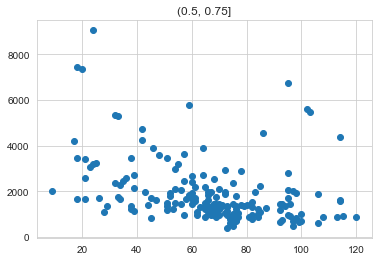

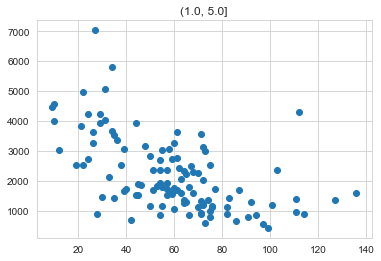

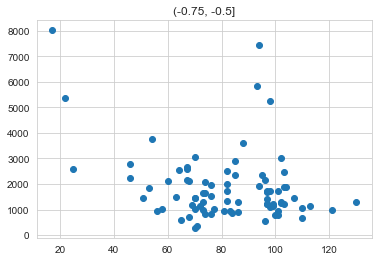

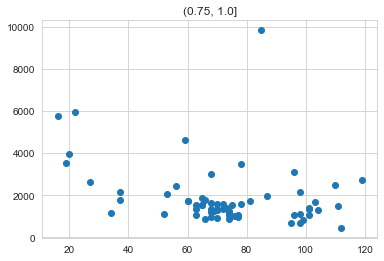

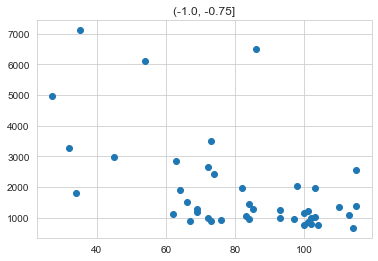

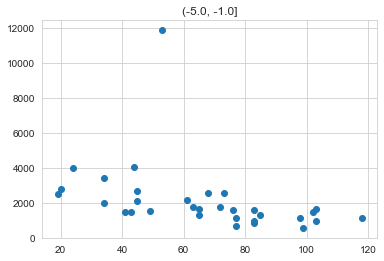

In [93]:
for x in train.logerror_bin.value_counts().index:
    plt.scatter(x='age', y='calculatedfinishedsquarefeet', data=train[train.logerror_bin == x])
    plt.title(x)
    plt.ticklabel_format(style='plain', axis='y')
    plt.ticklabel_format(style='plain', axis='x')
    plt.show()

In [134]:
train.logerror_bin

28107    (-0.25, 0.0]
14225     (0.25, 0.5]
36391     (0.0, 0.25]
40299    (-0.25, 0.0]
46824     (0.0, 0.25]
             ...     
27573    (-0.25, 0.0]
42471     (0.0, 0.25]
49174     (0.0, 0.25]
16156     (0.0, 0.25]
39201    (-0.25, 0.0]
Name: logerror_bin, Length: 31391, dtype: category
Categories (10, interval[float64, right]): [(-5.0, -1.0] < (-1.0, -0.75] < (-0.75, -0.5] < (-0.5, -0.25] ... (0.25, 0.5] < (0.5, 0.75] < (0.75, 1.0] < (1.0, 5.0]]

In [140]:
train.logerror_bin.value_counts().index

CategoricalIndex([  (0.0, 0.25],  (-0.25, 0.0],   (0.25, 0.5], (-0.5, -0.25],
                    (0.5, 0.75],    (1.0, 5.0], (-0.75, -0.5],   (0.75, 1.0],
                  (-1.0, -0.75],  (-5.0, -1.0]],
                 categories=[(-5.0, -1.0], (-1.0, -0.75], (-0.75, -0.5], (-0.5, -0.25], (-0.25, 0.0], (0.0, 0.25], (0.25, 0.5], (0.5, 0.75], ...], ordered=True, dtype='category')

In [ ]:
train.